In [5]:
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DATA_DIRECTORY = os.environ.get("DATA_DIRECTORY")

In [6]:
def merge_picarro_files(input_path:str, output_path:str, output_name:str="picarro"):
    """Example Path: .../BaseFolder/Year/Month/Day/*.dat
    
    input_path:str = ".../BaseFolder"
    
    """
    path = os.path.join(input_path, "*/*/*/*.dat")
    filenames = glob.glob(path)
    

    df_list = []
    #read all files into pandas dataframe
    for filename in filenames:
        df_list.append(pd.read_csv(filename,sep='\s+'))

    # concat all read files
    df_picarro = pd.concat(df_list, ignore_index=True)
    
    # calculate datetime object for dataframe and sort by time
    df_picarro["datetime"] = pd.to_datetime((df_picarro['DATE'] + ' ' + df_picarro['TIME']))
    df_picarro.sort_values(by='datetime', inplace = True)
    
    # fix: some value seems to be a int in this float column
    df_picarro.EtalonTemp = pd.to_numeric(df_picarro.EtalonTemp, errors='coerce').fillna(0).astype(np.float64)
    
    # save dataframe as parquet file
    df_picarro.to_parquet(path = f"{output_path}/{output_name}.parquet")
    
    return df_picarro

In [7]:
output_path = os.path.join(DATA_DIRECTORY, "processed", "picarro")

# DWD Picarro G2301 ID413
print("Starting read for DWD Picarro G2301 ID413.")
path = "/Users/patrickaigner/Documents/AREAS/ACROPOLIS/Database/DWD_Picarro_G2301_413/"
df_p_413 = merge_picarro_files(input_path=path, output_path=output_path, output_name="DWD_Picarro_G2301_413")
print("Finished read for DWD Picarro G2301 ID413.")

# LSCE Picarro G2401 ID520
print("Starting read for ICOS_Picarro_G2401_529.")
path = "/Users/patrickaigner/Documents/AREAS/ACROPOLIS/Database/ICOS_Picarro_G2401_529/"
#df_p_529 = merge_picarro_files(input_path=path, output_path=output_path, output_name="ICOS_Picarro_G2401_529")
print("Starting read for ICOS_Picarro_G2401_529.")

Starting read for DWD Picarro G2301 ID413.
Finished read for DWD Picarro G2301 ID413.
Starting read for ICOS_Picarro_G2401_529.
Starting read for ICOS_Picarro_G2401_529.


/Users/patrickaigner/Documents/PROJECTS/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patrickaigner/Documents/PROJECTS/acropolis-visualisation/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


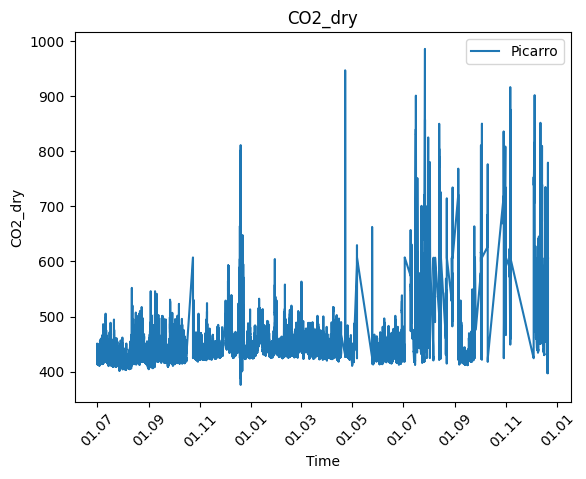

In [8]:
df_plot = df_p_413[["datetime", "CO2_dry"]] \
    .loc[(df_p_413['CO2_dry'] > 300) & (df_p_413['CO2_dry'] < 1000)] \
    .set_index("datetime") \
    .resample('1min').mean() 
    
sns.lineplot(data=df_plot,x='datetime',y="CO2_dry",label="Picarro")

# set axes labels
plt.xlabel("Time")
plt.ylabel('CO2_dry')
plt.xticks(rotation=45)

# plt.legend(title="Systems", bbox_to_anchor=(1, 1))
plt.title(label='CO2_dry')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

# show the plot
plt.show()

In [9]:
df_plot = df_p_529[["datetime", "CO2_dry"]] \
    .loc[(df_p_529['CO2_dry'] > 300) & (df_p_529['CO2_dry'] < 1000)] \
    .set_index("datetime") \
    .resample('1min').mean() 
    
sns.lineplot(data=df_plot,x='datetime',y="CO2_dry",label="Picarro")

# set axes labels
plt.xlabel("Time")
plt.ylabel('CO2_dry')
plt.xticks(rotation=45)
# plt.legend(title="Systems", bbox_to_anchor=(1, 1))
plt.title(label='CO2_dry')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

# show the plot
plt.show()

NameError: name 'df_p_529' is not defined